<a href="https://colab.research.google.com/github/Mohammed-Aasim-9988/Assignments_DS/blob/main/Glass_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [ ]:
glass = pd.read_csv("glass.csv")

In [ ]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass.decribe()

AttributeError: 'DataFrame' object has no attribute 'decribe'

In [ ]:
glass[glass.duplicated()].shape

(1, 10)

In [ ]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
df = glass.drop_duplicates()

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
corr = df.corr()

In [ ]:
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

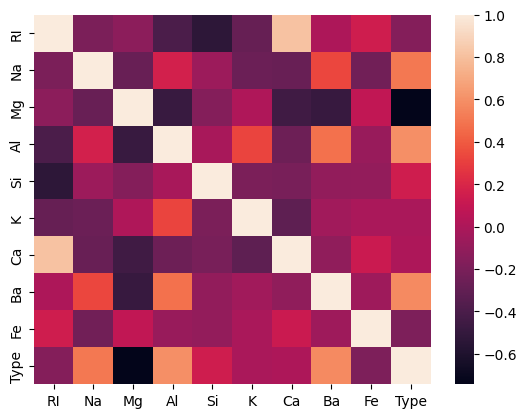

In [ ]:
sns.heatmap(corr)

In [ ]:
#We can notice that Ca and K values don't affect Type that much.

#Also Ca and RI are highly correlated, this means using only RI is enough.

#So we can go ahead and drop Ca, and also K.(performed later)

#Scatter plot of two features & pair plot

<Axes: xlabel='RI', ylabel='Na'>

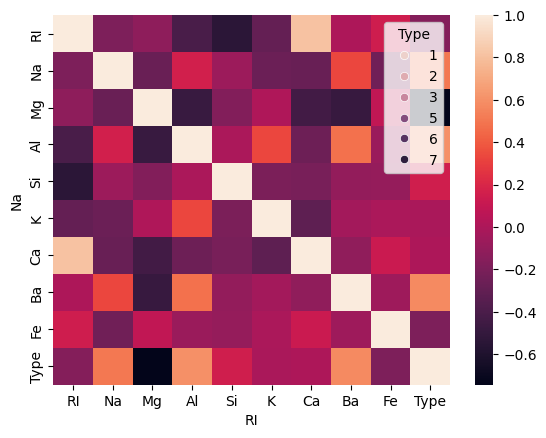

In [ ]:
# Import necessary modules
import seaborn as sns
import pandas as pd

# Load the data into a Pandas DataFrame
df = pd.read_csv("glass.csv")

# Calculate the correlation matrix
corr = df.corr()

# Display the heatmap of the correlation matrix
sns.heatmap(corr)

# Drop the columns 'Ca' and 'K'
df.drop(['Ca', 'K'], axis=1, inplace=True)

# Create a scatter plot of 'RI' vs 'Na', colored by 'Type'
sns.scatterplot(x='RI', y='Na', hue='Type', data=df)

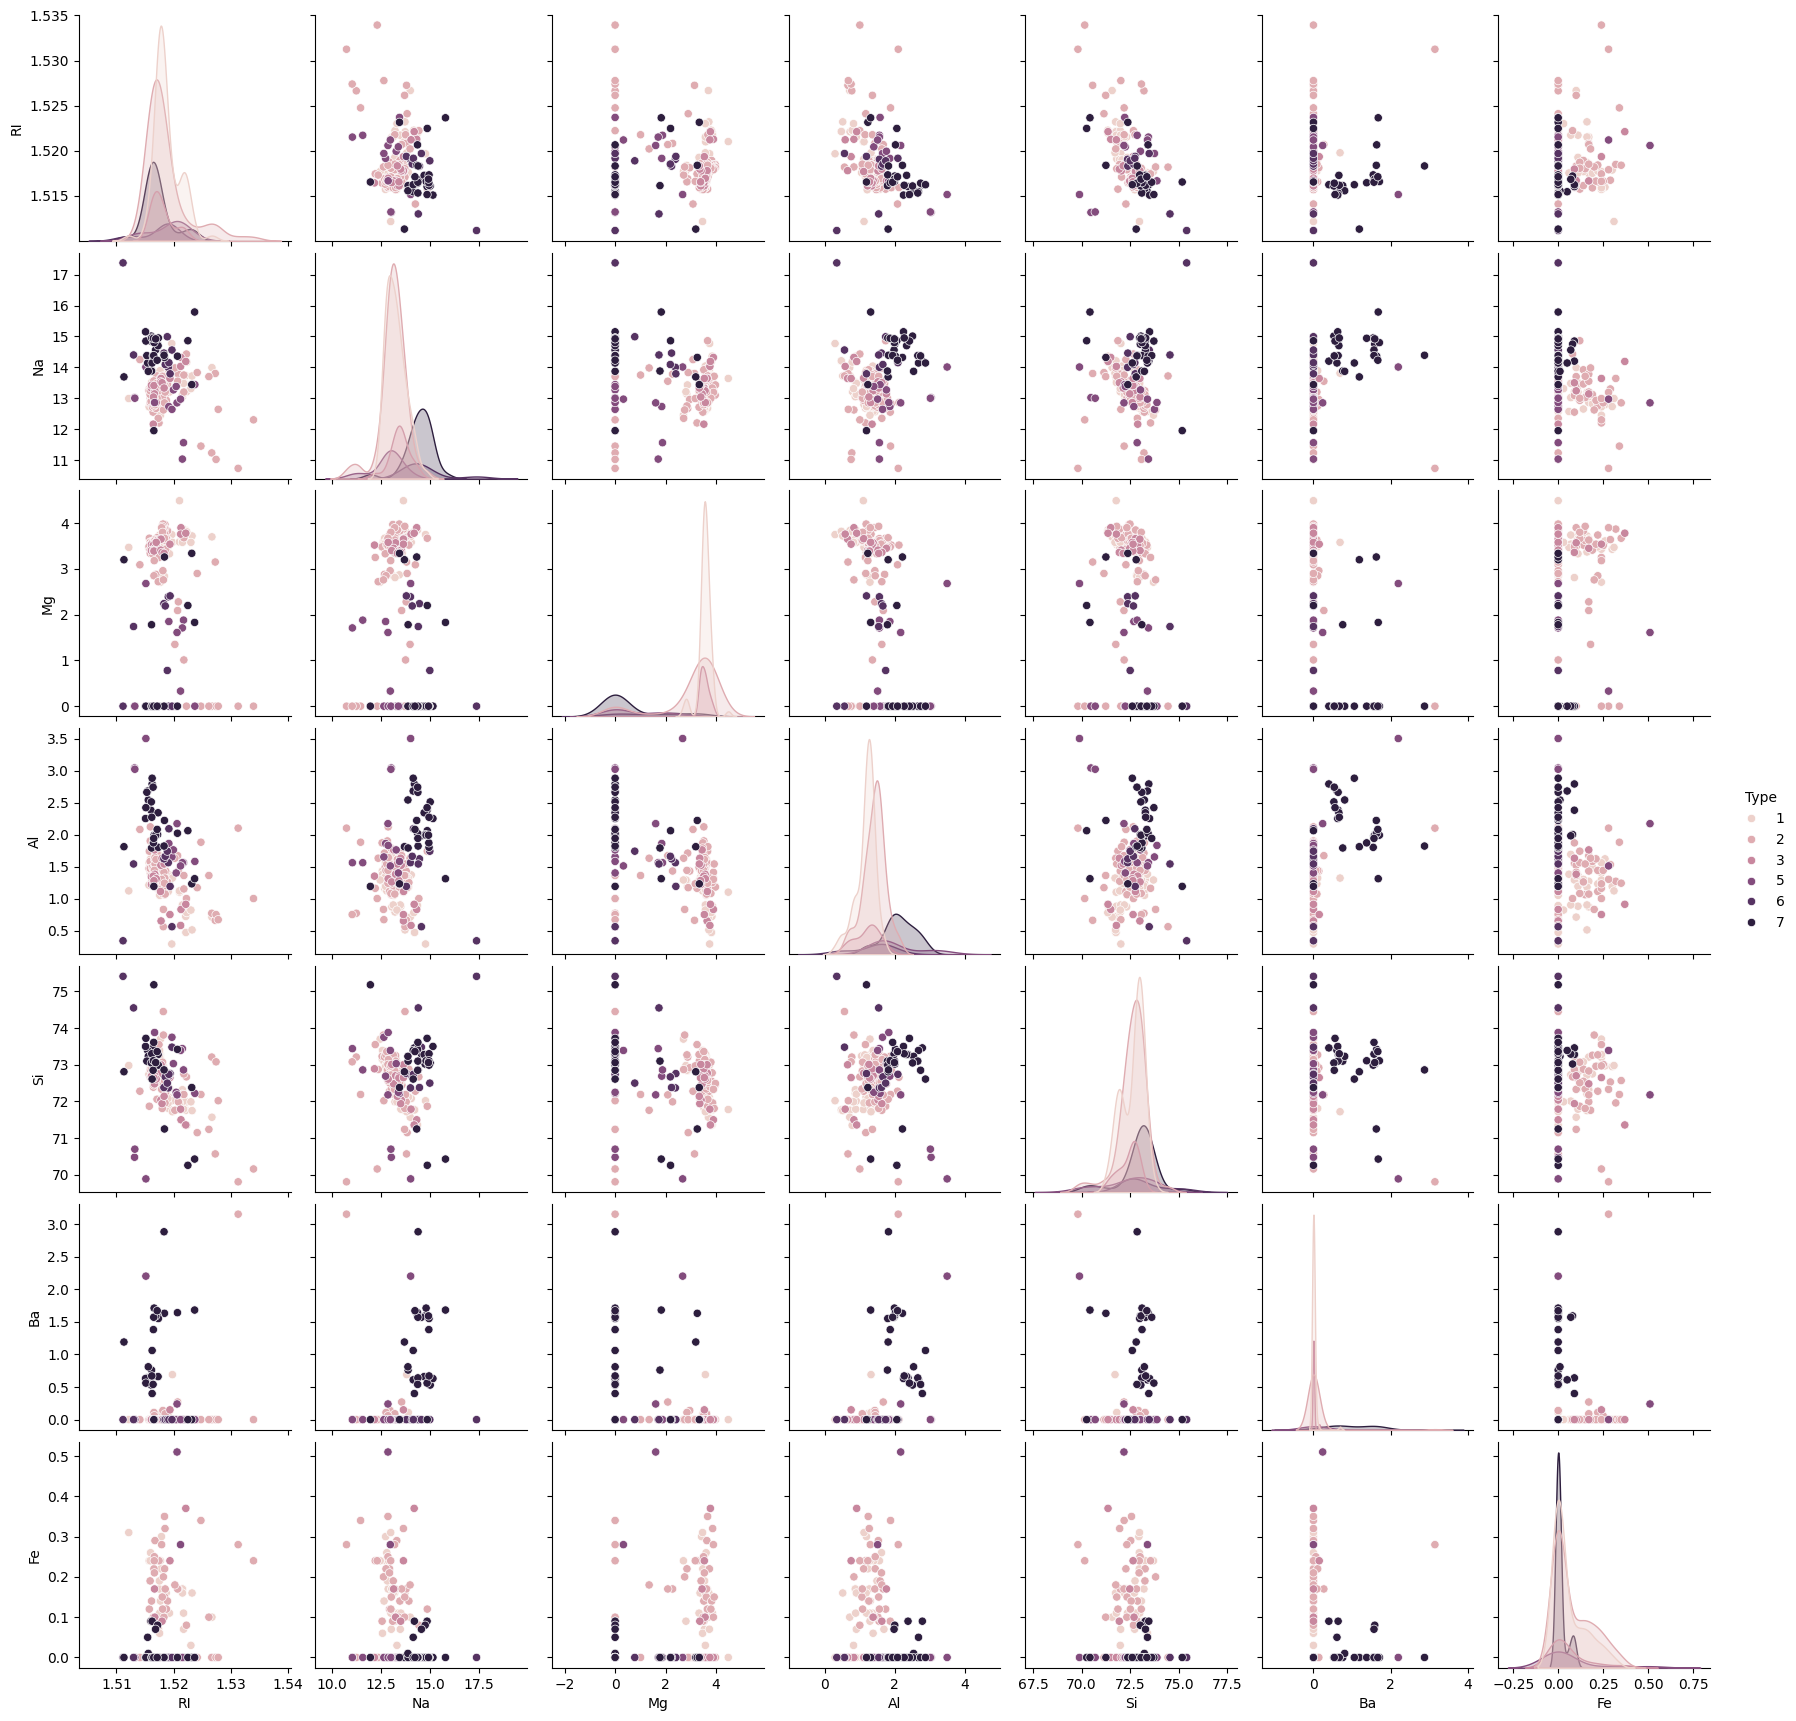

In [ ]:
#pairwise plot of all the features
sns.pairplot(df,hue='Type')
plt.show()

##The pairplot shows that the data is not linear and KNN can be applied to get nearest neighbors and classify the glass types

In [ ]:
df

,RI,Na,Mg,Al,Si,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.00,0.0,1
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,1.57,0.0,7


# Feature Scaling

In [ ]:
DF= df.iloc[:,0:9]

In [ ]:
DF

,RI,Na,Mg,Al,Si,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.00,0.0,1
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,1.57,0.0,7


In [ ]:
array= DF.values

In [ ]:
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalization function
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [ ]:
!pip install pandas
import pandas as pd
!pip install numpy
import numpy as np
from sklearn.preprocessing import StandardScaler

DF = pd.DataFrame(np.random.randint(0, 100, size=(214, 8)), columns=['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8'])
array = DF.values

# Normalization function
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

df_knn = pd.DataFrame(X, columns=DF.columns)

In [ ]:
df_knn

,col1,col2,col3,col4,col5,col6,col7,col8
0,-0.192184,1.530854,-0.951182,-1.449083,-0.427012,-1.216293,-0.519722,0.106289
1,-0.019959,-1.697907,1.199273,-1.176045,0.822873,0.419084,-1.050524,-0.530455
2,-1.225536,0.232692,1.234526,1.281305,0.406245,0.713452,-0.590496,0.106289
3,-1.363316,1.264564,-0.774915,-1.244304,0.440964,-1.150877,-0.944364,-0.141333
4,-0.261074,-0.066883,-0.316621,-1.585603,1.621411,0.648037,-0.838203,1.273653
...,...,...,...,...,...,...,...,...
209,0.978948,1.397709,0.670473,-1.005395,-0.878359,1.302188,1.214229,-1.237948
210,0.841168,0.964988,0.106419,0.496318,0.545121,1.302188,-1.050524,1.309028
211,-0.639970,1.131419,-0.457635,-1.483213,-1.017235,0.713452,-0.838203,-1.308697
212,1.323399,0.931702,-1.444729,-1.517343,1.482535,1.171358,0.931135,0.106289


In [ ]:
x= df_knn
y= df['Type']

In [ ]:
x

,col1,col2,col3,col4,col5,col6,col7,col8
0,-0.192184,1.530854,-0.951182,-1.449083,-0.427012,-1.216293,-0.519722,0.106289
1,-0.019959,-1.697907,1.199273,-1.176045,0.822873,0.419084,-1.050524,-0.530455
2,-1.225536,0.232692,1.234526,1.281305,0.406245,0.713452,-0.590496,0.106289
3,-1.363316,1.264564,-0.774915,-1.244304,0.440964,-1.150877,-0.944364,-0.141333
4,-0.261074,-0.066883,-0.316621,-1.585603,1.621411,0.648037,-0.838203,1.273653
...,...,...,...,...,...,...,...,...
209,0.978948,1.397709,0.670473,-1.005395,-0.878359,1.302188,1.214229,-1.237948
210,0.841168,0.964988,0.106419,0.496318,0.545121,1.302188,-1.050524,1.309028
211,-0.639970,1.131419,-0.457635,-1.483213,-1.017235,0.713452,-0.838203,-1.308697
212,1.323399,0.931702,-1.444729,-1.517343,1.482535,1.171358,0.931135,0.106289


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=45)

In [ ]:
x_train

,col1,col2,col3,col4,col5,col6,col7,col8
197,-0.708860,1.464281,1.657567,1.520214,0.440964,0.190132,1.108069,-1.662444
67,-0.846640,-1.365045,-1.409475,-0.698227,-0.739483,-0.496727,-0.802817,-0.636579
102,1.082283,-1.198614,-0.528141,-0.425188,-1.503301,-0.921925,-1.369005,-1.344072
0,-0.192184,1.530854,-0.951182,-1.449083,-0.427012,-1.216293,-0.519722,0.106289
61,-1.122201,-1.065469,-1.021688,-0.800616,1.447816,0.746160,-0.059695,1.627400
...,...,...,...,...,...,...,...,...
32,1.426734,-1.431617,-1.444729,0.257409,0.718716,-1.347123,-1.616712,-0.070584
124,1.288954,0.432409,-0.105101,1.076526,-1.017235,-1.379830,-1.156684,1.379777
131,0.048931,-0.433032,-0.457635,0.120890,-0.357574,-1.543368,0.117239,-0.565829
158,1.357844,0.265978,-1.762009,-0.186279,0.475683,-0.267774,0.364947,1.026031


In [ ]:
x_test

,col1,col2,col3,col4,col5,col6,col7,col8
83,-1.397761,-0.799180,0.846740,0.666968,1.170064,1.465726,0.471107,0.495411
62,1.598959,-1.564762,-0.633902,0.086760,-0.114540,-1.641491,-1.404392,-0.530455
84,-0.088849,-0.033597,-0.210861,-1.176045,1.065906,1.040528,0.895748,0.955281
138,-0.708860,1.264564,-1.762009,-0.800616,-1.711615,0.124717,-0.519722,-1.627069
188,-0.639970,-0.532890,1.234526,1.110656,-1.260268,-1.020047,0.117239,-0.247457
74,-0.674415,0.365837,0.247432,-0.664097,1.551973,-0.104236,-1.156684,1.061405
50,1.254508,1.197992,0.423699,1.110656,0.892311,-1.412538,-0.201242,0.990656
157,0.358937,0.964988,0.846740,-0.561707,0.614559,-0.071529,0.081853,-0.459705
190,-1.638877,-1.398331,1.093513,0.803487,1.656130,-0.464019,0.081853,0.495411
91,0.978948,-0.000311,0.987753,1.588474,-1.260268,1.563848,1.037295,1.556651


In [ ]:
y_test

83     2
62     1
84     2
138    2
188    7
74     2
50     1
157    3
190    7
91     2
192    7
33     1
139    2
3      1
25     1
100    2
40     1
178    6
160    3
13     1
201    7
101    2
196    7
73     2
69     1
109    2
64     1
206    7
130    2
79     2
96     2
193    7
26     1
44     1
116    2
170    5
195    7
38     1
80     2
82     2
133    2
99     2
10     1
Name: Type, dtype: int64

# **KNN Model**

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    24
2    16
7     2
6     1
dtype: int64

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions


col_0,1,2,6,7
Type,,,,
1,8,5,0,0
2,10,6,0,2
3,0,1,1,0
5,1,0,0,0
6,0,1,0,0
7,5,3,0,0


In [ ]:
print("Accuracy", accuracy_score(y_test,preds)*100)

Accuracy 32.55813953488372


In [ ]:
model.score(x_train,y_train)

0.5730994152046783

In [ ]:

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.33      0.62      0.43        13
           2       0.38      0.33      0.35        18
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         8

    accuracy                           0.33        43
   macro avg       0.12      0.16      0.13        43
weighted avg       0.26      0.33      0.28        43



#Grid Search for Algorithm Tuning

In [ ]:
n_neighbors = np.array(range(1,15))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.30841638981173863
{'n_neighbors': 2}


#Visualizing the CV results

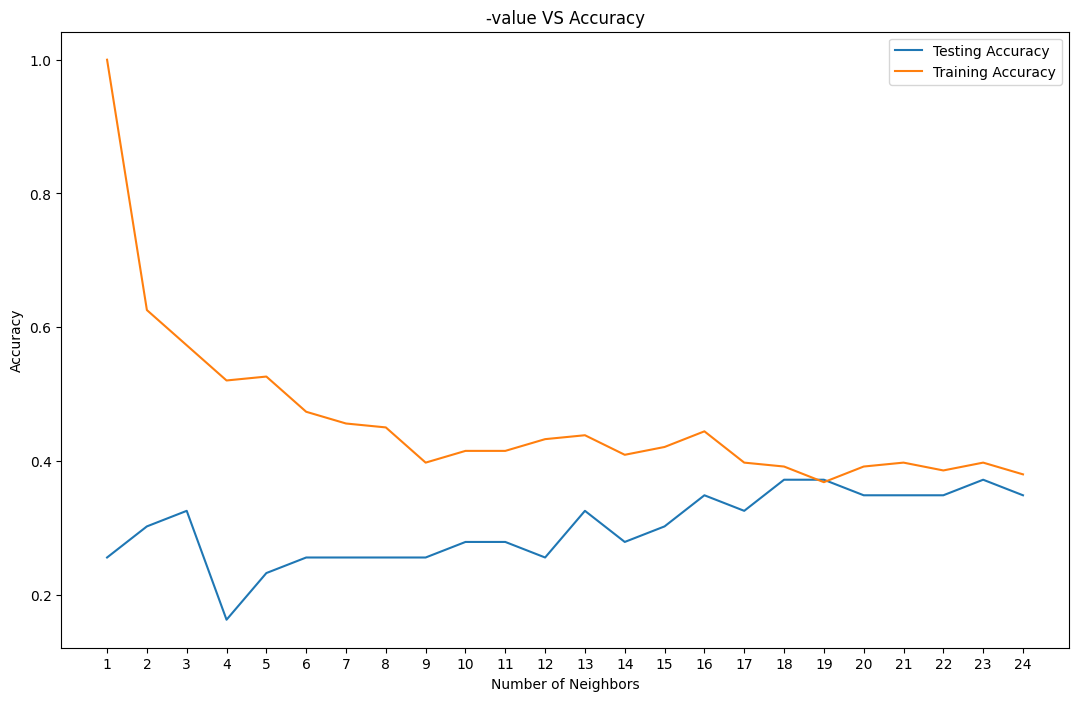

Best accuracy is 0.37209302325581395 with K = 18


In [ ]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

#Thank You